In [189]:
import pandas as pd 
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif







In [146]:
df= pd.read_csv("diabetes.csv")

In [147]:
# Loại bỏ dấu cách (replace " " bằng "_")
df.columns = df.columns.str.replace(' ', '_')


PHASE 1. EXPLOYRATORY DATA ANALYSIS - EDA

In [148]:
#Show first 5 rows 
print(df.head())

   Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  Diabetes_Pedigree_Function  Age  Outcome
0            6      148              72              35        0  33.6                       0.627   50        1
1            1       85              66              29        0  26.6                       0.351   31        0
2            8      183              64               0        0  23.3                       0.672   32        1
3            1       89              66              23       94  28.1                       0.167   21        0
4            0      137              40              35      168  43.1                       2.288   33        1


In [149]:
#Show size of DataFrame 
print(df.shape)

(768, 9)


In [150]:
#Show datatype of each column 
print(df.dtypes)

Pregnancies                     int64
Glucose                         int64
Blood_Pressure                  int64
Skin_Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                             int64
Outcome                         int64
dtype: object


In [151]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [152]:
#Show descriptive statistics
print(df.describe().T.round(2))

                            count    mean     std    min    25%     50%     75%     max
Pregnancies                 768.0    3.85    3.37   0.00   1.00    3.00    6.00   17.00
Glucose                     768.0  120.89   31.97   0.00  99.00  117.00  140.25  199.00
Blood_Pressure              768.0   69.11   19.36   0.00  62.00   72.00   80.00  122.00
Skin_Thickness              768.0   20.54   15.95   0.00   0.00   23.00   32.00   99.00
Insulin                     768.0   79.80  115.24   0.00   0.00   30.50  127.25  846.00
BMI                         768.0   31.99    7.88   0.00  27.30   32.00   36.60   67.10
Diabetes_Pedigree_Function  768.0    0.47    0.33   0.08   0.24    0.37    0.63    2.42
Age                         768.0   33.24   11.76  21.00  24.00   29.00   41.00   81.00
Outcome                     768.0    0.35    0.48   0.00   0.00    0.00    1.00    1.00


In [153]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64


Descriptive Statistics

In [154]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
Blood_Pressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
Skin_Thickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
Diabetes_Pedigree_Function,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [155]:
# Descriptive statistics function
def descriptive_stats(dataframe):
    stats = pd.DataFrame(index=dataframe.columns)
    stats['Mean'] = dataframe.mean()
    stats['Median'] = dataframe.median()
    stats['Mode'] = dataframe.mode().iloc[0]
    stats['Std'] = dataframe.std()
    stats['Variance'] = dataframe.var()
    stats['Min'] = dataframe.min()
    stats['5%'] = dataframe.quantile(0.05)
    stats['25%'] = dataframe.quantile(0.25)
    stats['50%'] = dataframe.quantile(0.50)
    stats['75%'] = dataframe.quantile(0.75)
    stats['95%'] = dataframe.quantile(0.95)
    stats['Max'] = dataframe.max()
    stats['Range'] = stats['Max'] - stats['Min']
    stats['IQR'] = stats['75%'] - stats['25%']
    stats['Skewness'] = dataframe.apply(skew)
    stats['Kurtosis'] = dataframe.apply(kurtosis)
    return stats.round(2)

# Call function and display
stats_df = descriptive_stats(df)
# Rounding and formatting
styled_stats = stats_df.style\
    .background_gradient(cmap='Blues', axis=1)\
    .format("{:.2f}")\
    .set_caption("Descriptive statistics of attributes in the Diabetes dataset")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold')]
    }])

styled_stats


,Mean,Median,Mode,Std,Variance,Min,5%,25%,50%,75%,95%,Max,Range,IQR,Skewness,Kurtosis
Pregnancies,3.85,3.00,1.00,3.37,11.35,0.00,0.00,1.00,3.00,6.00,10.00,17.00,17.00,5.00,0.90,0.15
Glucose,120.89,117.00,99.00,31.97,1022.25,0.00,79.00,99.00,117.00,140.25,181.00,199.00,199.00,41.25,0.17,0.63
Blood_Pressure,69.11,72.00,70.00,19.36,374.65,0.00,38.70,62.00,72.00,80.00,90.00,122.00,122.00,18.00,-1.84,5.14
Skin_Thickness,20.54,23.00,0.00,15.95,254.47,0.00,0.00,0.00,23.00,32.00,44.00,99.00,99.00,32.00,0.11,-0.52
Insulin,79.80,30.50,0.00,115.24,13281.18,0.00,0.00,0.00,30.50,127.25,293.00,846.00,846.00,127.25,2.27,7.16
BMI,31.99,32.00,32.00,7.88,62.16,0.00,21.80,27.30,32.00,36.60,44.40,67.10,67.10,9.30,-0.43,3.26
Diabetes_Pedigree_Function,0.47,0.37,0.25,0.33,0.11,0.08,0.14,0.24,0.37,0.63,1.13,2.42,2.34,0.38,1.92,5.55
Age,33.24,29.00,22.00,11.76,138.30,21.00,21.00,24.00,29.00,41.00,58.00,81.00,60.00,17.00,1.13,0.63
Outcome,0.35,0.00,0.00,0.48,0.23,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.63,-1.60


In [156]:
#Transformation Skewness >1
df['Insulin_log'] = np.log1p(df['Insulin'])
df['DPF_log'] = np.log1p(df['Diabetes_Pedigree_Function'])
df['Age_log'] = np.log1p(df['Age'])


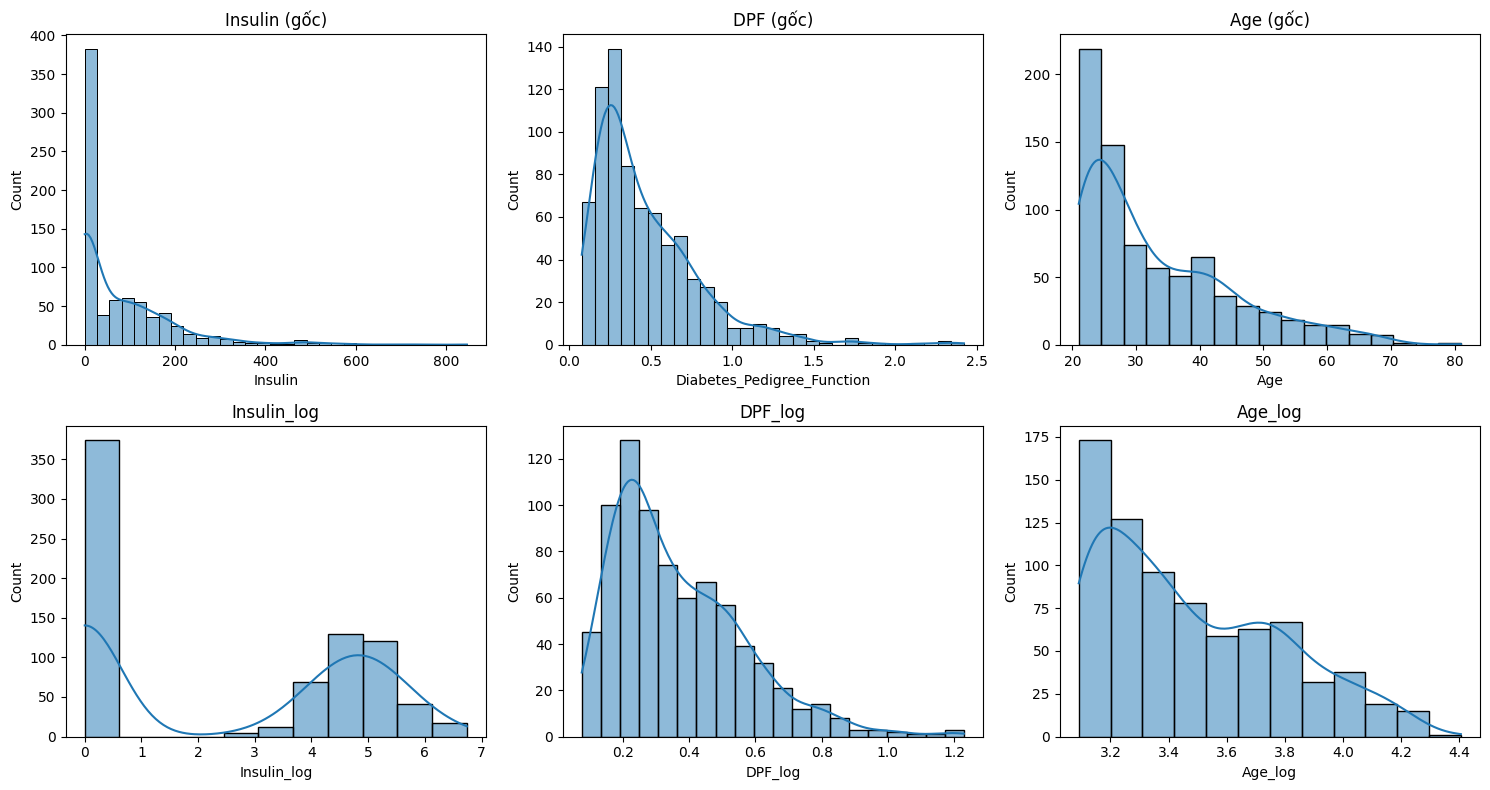

In [157]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(df['Insulin'], ax=axes[0, 0], kde=True).set_title("Insulin (gốc)")
sns.histplot(df['Diabetes_Pedigree_Function'], ax=axes[0, 1], kde=True).set_title("DPF (gốc)")
sns.histplot(df['Age'], ax=axes[0, 2], kde=True).set_title("Age (gốc)")

sns.histplot(df['Insulin_log'], ax=axes[1, 0], kde=True).set_title("Insulin_log")
sns.histplot(df['DPF_log'], ax=axes[1, 1], kde=True).set_title("DPF_log")
sns.histplot(df['Age_log'], ax=axes[1, 2], kde=True).set_title("Age_log")

plt.tight_layout()
plt.show()

In [158]:
#Phát hiện và phân tích missing value ẩn 
columns_to_check = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI','Diabetes_Pedigree_Function',
    'Age']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    percent = (zero_count / df.shape[0]) * 100
    print(f"{col:<20} | Số lượng = 0: {zero_count:<4} ({percent:.1f}%)")


Pregnancies          | Số lượng = 0: 111  (14.5%)
Glucose              | Số lượng = 0: 5    (0.7%)
Blood_Pressure       | Số lượng = 0: 35   (4.6%)
Skin_Thickness       | Số lượng = 0: 227  (29.6%)
Insulin              | Số lượng = 0: 374  (48.7%)
BMI                  | Số lượng = 0: 11   (1.4%)
Diabetes_Pedigree_Function | Số lượng = 0: 0    (0.0%)
Age                  | Số lượng = 0: 0    (0.0%)



*Review
Dữ liệu không chứa giá trị NaN rõ ràng, tuy nhiên một số feature lại có nhiều giá trị bằng `0` không hợp lý về mặt sinh học – đây được xem là **missing values ẩn** và cần được xử lý.

Dưới đây là thống kê số lượng các giá trị `0` theo từng cột:

| Feature                     | Số lượng = 0 | Tỉ lệ (%) | Hợp lý về mặt sinh học |
|-----------------------------|--------------|-----------|-------------------------|
| Pregnancies                 | 111          | 14.5%     |  Có thể (chưa từng mang thai) |
| Glucose                     | 5            | 0.7%      |  Không hợp lý (không thể có glucose = 0) |
| Blood Pressure              | 35           | 4.6%      |  Không hợp lý |
| Skin Thickness              | 227          | 29.6%     |  Không hợp lý (độ dày của da không thể =0) |
| Insulin                     | 374          | 48.7%     |  Không hợp lý (nồng độ insulin không thể = 0) |
| BMI                         | 11           | 1.4%      |  Không hợp lý (BMI không thể bằng 0) |
| Diabetes Pedigree Function  | 0            | 0.0%      |  Hợp lý |
| Age                         | 0            | 0.0%      |  Hợp lý |

> **Kết luận**: Có tới ~85% bản ghi có ít nhất một giá trị "0" không hợp lý. Các giá trị này sẽ được xử lý tại **Bước 2.1** bằng phương pháp **median imputation theo lớp `Outcome`**.


In [159]:
#Phân tích Target Variable
# Đếm số lượng từng lớp
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)  # Tỉ lệ %


Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


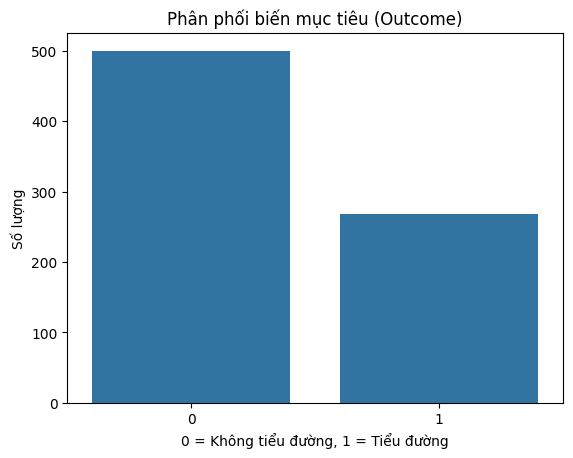

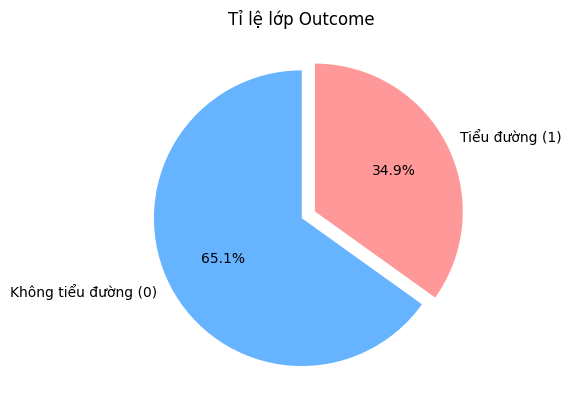

In [160]:

# Biểu đồ đếm
sns.countplot(data=df, x='Outcome')
plt.title("Phân phối biến mục tiêu (Outcome)")
plt.xlabel("0 = Không tiểu đường, 1 = Tiểu đường")
plt.ylabel("Số lượng")
plt.show()

# Biểu đồ hình tròn (pie chart)
df['Outcome'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Không tiểu đường (0)', 'Tiểu đường (1)'],
    colors=['#66b3ff','#ff9999'],
    explode=(0, 0.1)
)
plt.ylabel('')
plt.title("Tỉ lệ lớp Outcome")
plt.show()


Review :
Biến `Outcome` là biến mục tiêu phân loại nhị phân:
- `0`: Không bị tiểu đường
- `1`: Bị tiểu đường

| Lớp | Số lượng | Tỉ lệ (%) |
|-----|----------|-----------|
| 0   | 500      | 65.1%     |
| 1   | 268      | 34.9%     |

**Nhận xét:**
- Dữ liệu có **mất cân bằng lớp vừa phải** (65:35)
- Mô hình có thể bị lệch nếu không xử lý phù hợp
- Cần lưu ý:
  - Sử dụng `stratify` khi chia train/test
  - Ưu tiên dùng **precision**, **recall**, **f1-score**, **AUC** để đánh giá thay vì chỉ `accuracy`
  - Có thể áp dụng thêm kỹ thuật như **SMOTE**, hoặc `class_weight='balanced'` nếu cần


In [161]:
#Correlation Analysis
correlation_matrix = df.corr()

# Hiển thị tương quan của các feature với biến mục tiêu
print(correlation_matrix['Outcome'].sort_values(ascending=False))


Outcome                       1.000000
Glucose                       0.466581
BMI                           0.292695
Age_log                       0.274247
Age                           0.238356
Pregnancies                   0.221898
DPF_log                       0.179950
Diabetes_Pedigree_Function    0.173844
Insulin                       0.130548
Skin_Thickness                0.074752
Blood_Pressure                0.065068
Insulin_log                   0.009783
Name: Outcome, dtype: float64


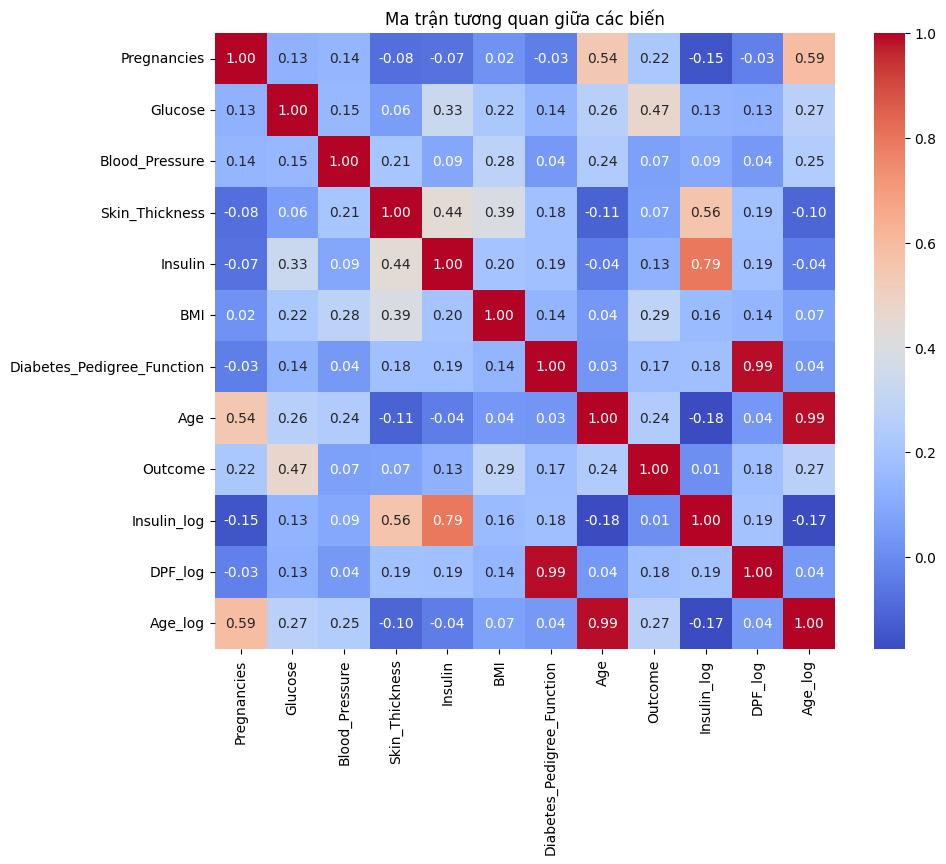

In [162]:
#Show visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()


Review – Phân tích tương quan giữa các biến

Dựa trên biểu đồ heatmap:

- `Glucose` và `Outcome` có tương quan dương khá mạnh (~0.47)
- `BMI` và `Outcome` cũng có tương quan vừa (~0.31)
- Một số cặp feature có tương quan với nhau như:
  - `Skin Thickness` và `Insulin`: ~0.44
  - `BMI` và `Skin Thickness`: ~0.39

Không có cặp nào có tương quan quá cao (> 0.75)


In [163]:
# Outlier Detection
outlier_data = []

for column in df.columns:
    if column == 'Outcome':
        continue  # Không xử lý target

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_count = outlier_mask.sum()
    outlier_percent = 100 * outlier_count / df.shape[0]

    outlier_data.append({
        'Feature': column,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2),
        'Outlier Count': outlier_count,
        'Outlier %': round(outlier_percent, 2)
    })

# Create DataFrame
outlier_df = pd.DataFrame(outlier_data).sort_values(by='Outlier %', ascending=False).reset_index(drop=True)
# Show full
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(outlier_df)



                       Feature     Q1      Q3     IQR  Lower Bound  Upper Bound  Outlier Count  Outlier %
0               Blood_Pressure  62.00   80.00   18.00        35.00       107.00             45       5.86
1                      Insulin   0.00  127.25  127.25      -190.88       318.12             34       4.43
2   Diabetes_Pedigree_Function   0.24    0.63    0.38        -0.33         1.20             29       3.78
3                          BMI  27.30   36.60    9.30        13.35        50.55             19       2.47
4                      DPF_log   0.22    0.49    0.27        -0.18         0.89             13       1.69
5                          Age  24.00   41.00   17.00        -1.50        66.50              9       1.17
6                      Glucose  99.00  140.25   41.25        37.12       202.12              5       0.65
7                  Pregnancies   1.00    6.00    5.00        -6.50        13.50              4       0.52
8               Skin_Thickness   0.00   32.00 

PHASE 2: DATA PREPROCESSING AND CLEANING

In [164]:
# Tách cột không phải số (object, string...) ra
df_numeric = df.select_dtypes(include=['number']).copy()
df_non_numeric = df.select_dtypes(exclude=['number']).copy()


In [165]:
#
invalid_zero_features = ['Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI']
df_numeric[invalid_zero_features] = df_numeric[invalid_zero_features].replace(0, np.nan)

# Impute chỉ phần numeric
imputer = KNNImputer(n_neighbors=5)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)


In [166]:
# Ghép lại nếu bạn cần giữ các cột như 'Obese' cho các bước sau
df_imputed = pd.concat([df_numeric_imputed, df_non_numeric], axis=1)


In [167]:
# Kiểm tra còn missing không?
print("Số lượng missing value sau khi KNN Impute:")
print(df_numeric_imputed.isnull().sum())

# So sánh trước và sau Impute cho 1 vài cột
print("\nSo sánh Glucose trước & sau Impute:")
print("Trước Impute (giá trị 0):", df_numeric['Glucose'].value_counts().get(0, 0))
print("Sau Impute (giá trị 0):", (df_numeric_imputed['Glucose'] == 0).sum())

print("\nSo sánh Blood_Pressure trước & sau Impute:")
print("Trước Impute (giá trị 0):", df_numeric['Blood_Pressure'].value_counts().get(0, 0))
print("Sau Impute (giá trị 0):", (df_numeric_imputed['Blood_Pressure'] == 0).sum())

# Hiển thị một vài dòng sau khi impute
print("\n5 dòng đầu sau khi KNN Impute:")
print(df_numeric_imputed.head())


Số lượng missing value sau khi KNN Impute:
Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
Insulin_log                   0
DPF_log                       0
Age_log                       0
dtype: int64

So sánh Glucose trước & sau Impute:
Trước Impute (giá trị 0): 0
Sau Impute (giá trị 0): 0

So sánh Blood_Pressure trước & sau Impute:
Trước Impute (giá trị 0): 0
Sau Impute (giá trị 0): 0

5 dòng đầu sau khi KNN Impute:
   Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  Diabetes_Pedigree_Function   Age  Outcome  Insulin_log   DPF_log   Age_log
0          6.0    148.0            72.0            35.0    169.0  33.6                       0.627  50.0      1.0     0.000000  0.486738  3.931826
1          1.0     85.0            66.0      

In [168]:

# Kiểm tra số lượng giá trị 0 trước và sau khi Impute 
df = pd.read_csv("diabetes.csv")  # hoặc dataset bạn dùng
df.columns = df.columns.str.replace(' ', '_')
df_raw = df.copy()  # Lưu bản gốc thật sự


invalid_zero_features = ['Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI']
df_numeric = df.select_dtypes(include='number').copy()
df_numeric[invalid_zero_features] = df_numeric[invalid_zero_features].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
print("So sánh số lượng giá trị 0 trước & sau Impute:\n")

for col in invalid_zero_features:
    zero_before = (df_raw[col] == 0).sum()
    zero_after = (df_numeric_imputed[col] == 0).sum()
    print(f"{col}: Trước = {zero_before} | Sau = {zero_after}")




So sánh số lượng giá trị 0 trước & sau Impute:

Glucose: Trước = 5 | Sau = 0
Blood_Pressure: Trước = 35 | Sau = 0
Skin_Thickness: Trước = 227 | Sau = 0
Insulin: Trước = 374 | Sau = 0
BMI: Trước = 11 | Sau = 0


In [169]:
# Tạo bản sao từ dữ liệu đã impute
df_outlier_processed = df_numeric_imputed.copy()

# Danh sách các đặc trưng liên tục (đảm bảo KHÔNG chứa cột categorical như 'Obese')
continuous_features = [
    'Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness',
    'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age'
]

# Áp dụng Winsorization: cắt 1% dữ liệu mỗi đầu
for col in continuous_features:
    df_outlier_processed[col] = winsorize(df_outlier_processed[col], limits=[0.01, 0.01])


In [170]:
# Kết quả bước 2.2 
df_outlier_processed[continuous_features].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.83,3.34,0.00,1.00,3.00,6.00,13.0
Glucose,768.0,121.67,30.29,67.00,99.00,117.00,140.25,196.0
Blood_Pressure,768.0,72.39,11.82,44.00,64.00,72.00,80.00,106.0
Skin_Thickness,768.0,29.03,8.98,10.00,23.00,29.00,35.00,52.0
Insulin,768.0,152.24,93.24,23.00,87.90,133.70,190.15,540.0
BMI,768.0,32.39,6.72,19.50,27.50,32.09,36.60,52.3
Diabetes_Pedigree_Function,768.0,0.47,0.31,0.09,0.24,0.37,0.63,1.7
Age,768.0,33.21,11.65,21.00,24.00,29.00,41.00,67.0


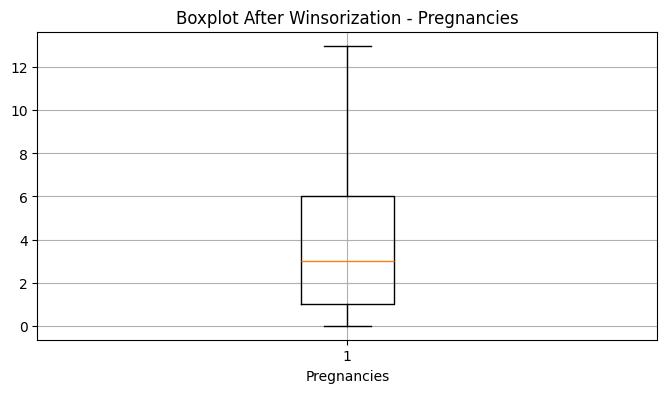

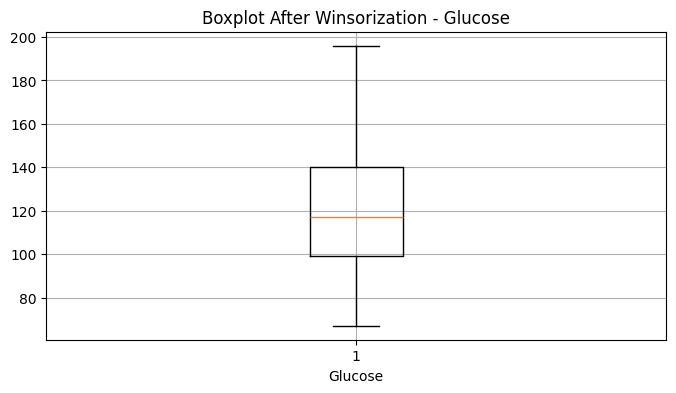

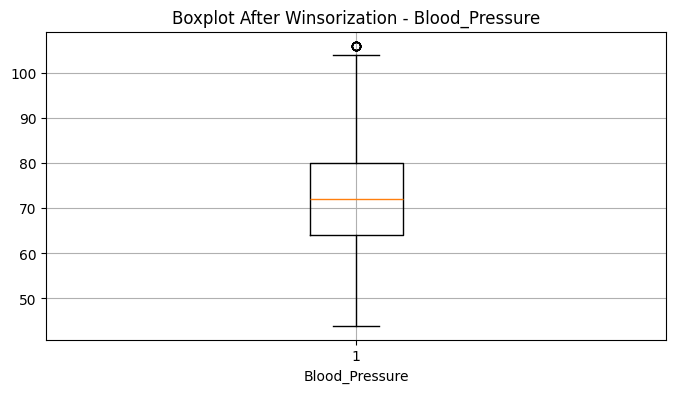

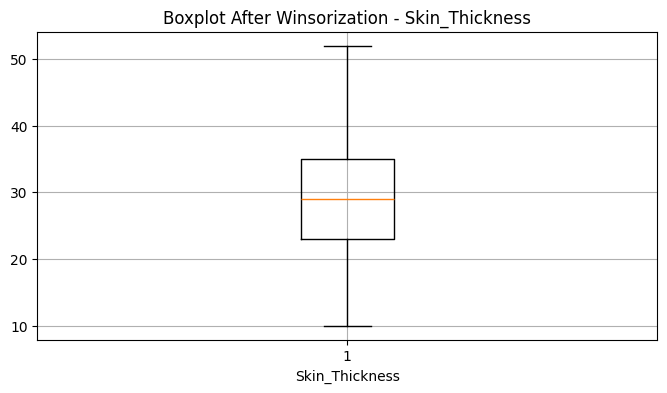

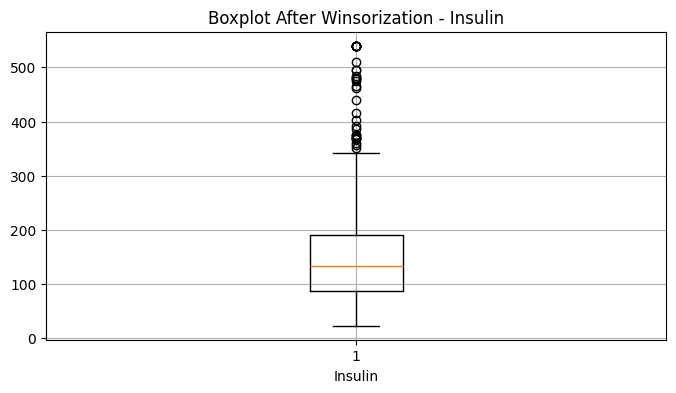

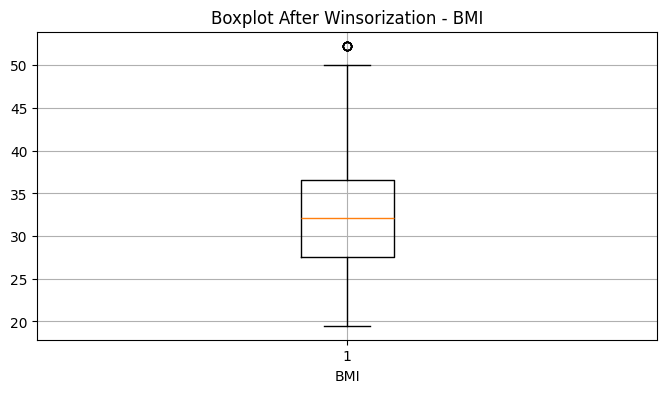

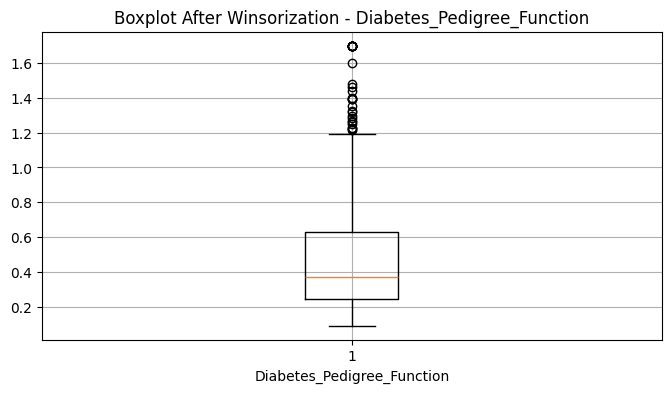

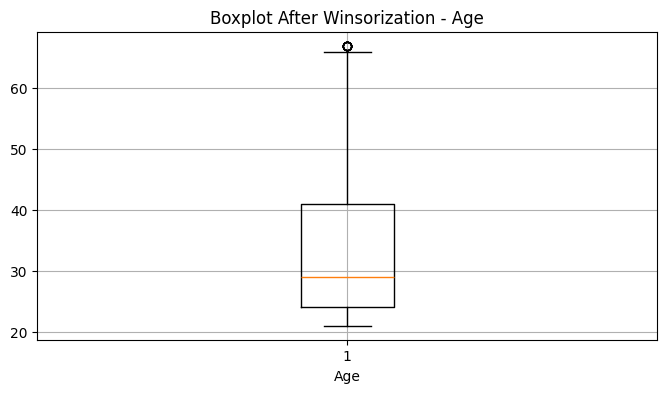

In [171]:
for col in continuous_features:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_outlier_processed[col])
    plt.title(f'Boxplot After Winsorization - {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


In [172]:
# continuous_features = [
#    'Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness',
#    'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age'
# ]


In [173]:
# Tạo bản sao để scale
df_scaled = df_outlier_processed.copy()

# Scale các biến liên tục đã được xử lý outlier
scaler = RobustScaler()
df_scaled[continuous_features] = scaler.fit_transform(df_scaled[continuous_features])



In [174]:
df_scaled[continuous_features].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.17,0.67,-0.60,-0.40,0.0,0.60,2.00
Glucose,768.0,0.11,0.73,-1.21,-0.44,0.0,0.56,1.92
Blood_Pressure,768.0,0.02,0.74,-1.75,-0.50,0.0,0.50,2.12
Skin_Thickness,768.0,0.00,0.75,-1.58,-0.50,0.0,0.50,1.92
Insulin,768.0,0.18,0.91,-1.08,-0.45,0.0,0.55,3.97
BMI,768.0,0.03,0.74,-1.38,-0.50,-0.0,0.50,2.22
Diabetes_Pedigree_Function,768.0,0.25,0.82,-0.73,-0.34,0.0,0.66,3.47
Age,768.0,0.25,0.69,-0.47,-0.29,0.0,0.71,2.24


PHASE 3. FEATURE ENGINEERING VÀ SELECTION

In [175]:
# New fearure Create
# BMI_Category 
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)


In [176]:
#Age_Group
def age_group(age):
    if age <= 30:
        return 'Young'
    elif age <= 45:
        return 'Middle'
    elif age <= 60:
        return 'Mature'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)


In [177]:
# Glucose_Level
def glucose_level(g):
    if g < 100:
        return 'Normal'
    elif g < 126:
        return 'Prediabetic'
    else:
        return 'Diabetic'

df['Glucose_Level'] = df['Glucose'].apply(glucose_level)


In [178]:
# Hypertension_Risk 
df['Hypertension_Risk'] = df['Blood_Pressure'].apply(lambda x: 1 if x >= 80 else 0)


In [179]:
# High_Risk_Pregnancies 
df['High_Risk_Pregnancies'] = df['Pregnancies'].apply(lambda x: 1 if x > 4 else 0)


In [180]:
# Insulin_Glucose_Ratio 
df['Insulin_Glucose_Ratio'] = df['Insulin'] / (df['Glucose'] + 1e-5)  # tránh chia 0


In [181]:
# Risk_Score
# Scale đơn giản hóa: chia về cùng thang điểm
df['Risk_Score'] = (
    (df['BMI'] / df['BMI'].max()) +
    (df['Age'] / df['Age'].max()) +
    (df['Glucose'] / df['Glucose'].max()) +
    (df['Diabetes_Pedigree_Function'] / df['Diabetes_Pedigree_Function'].max())
) / 4


In [182]:
df[['BMI_Category', 'Age_Group', 'Glucose_Level']].value_counts()
df[['Hypertension_Risk', 'High_Risk_Pregnancies']].mean()
df[['Insulin_Glucose_Ratio', 'Risk_Score']].describe()


,Insulin_Glucose_Ratio,Risk_Score
count,7.680000e+02,768.000000
mean,2.995411e+03,0.422418
std,8.299408e+04,0.084122
min,0.000000e+00,0.171403
25%,0.000000e+00,0.362696
50%,3.621258e-01,0.417063
75%,1.029791e+00,0.480450
max,2.300000e+06,0.774603


Tương quan giữa các đặc trưng và Outcome:
Outcome                       1.000000
Glucose                       0.496673
Insulin                       0.333493
BMI                           0.314448
Skin_Thickness                0.282078
Age                           0.242215
Pregnancies                   0.219811
Blood_Pressure                0.181057
Diabetes_Pedigree_Function    0.174079
Name: Outcome, dtype: float64


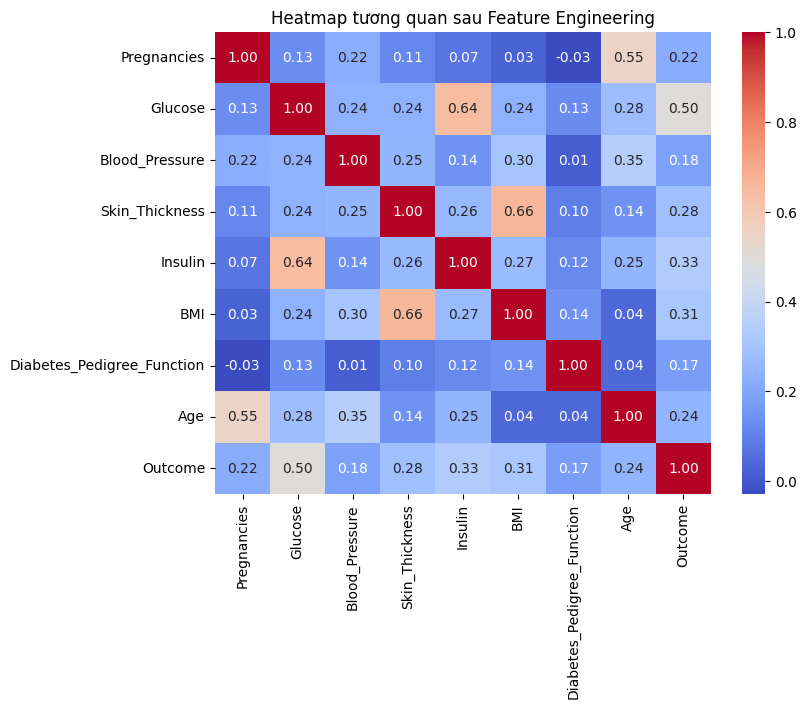

In [183]:
# Tính tương quan với biến mục tiêu
corr = df_scaled.corr()['Outcome'].sort_values(ascending=False)

# Hiển thị
print("Tương quan giữa các đặc trưng và Outcome:")
print(corr)

# Biểu đồ heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Heatmap tương quan sau Feature Engineering")
plt.show()


In [184]:
# Kiểm tra phân bố phần trăm (phát hiện mất cân bằng)
print(" BMI_Category distribution:")
print(df['BMI_Category'].value_counts(normalize=True) * 100)

print("\n Age_Group distribution:")
print(df['Age_Group'].value_counts(normalize=True) * 100)

print("\n Glucose_Level distribution:")
print(df['Glucose_Level'].value_counts(normalize=True) * 100)


 BMI_Category distribution:
BMI_Category
Obese          61.458333
Overweight     23.307292
Normal         13.281250
Underweight     1.953125
Name: proportion, dtype: float64

 Age_Group distribution:
Age_Group
Young     54.296875
Middle    30.338542
Mature    11.848958
Senior     3.515625
Name: proportion, dtype: float64

 Glucose_Level distribution:
Glucose_Level
Diabetic       38.671875
Prediabetic    35.677083
Normal         25.651042
Name: proportion, dtype: float64


In [185]:
# Tỷ lệ mắc tiểu đường theo từng nhóm
print("\nTỷ lệ tiểu đường theo BMI_Category:")
print(df.groupby('BMI_Category')['Outcome'].mean() * 100)

print("\nTỷ lệ tiểu đường theo Age_Group:")
print(df.groupby('Age_Group')['Outcome'].mean() * 100)

print("\nTỷ lệ tiểu đường theo Glucose_Level:")
print(df.groupby('Glucose_Level')['Outcome'].mean() * 100)

print("\nTỷ lệ mắc theo Hypertension_Risk:")
print(df.groupby('Hypertension_Risk')['Outcome'].mean() * 100)

print("\nTỷ lệ mắc theo High_Risk_Pregnancies:")
print(df.groupby('High_Risk_Pregnancies')['Outcome'].mean() * 100)



Tỷ lệ tiểu đường theo BMI_Category:
BMI_Category
Normal          6.862745
Obese          46.398305
Overweight     22.346369
Underweight    13.333333
Name: Outcome, dtype: float64

Tỷ lệ tiểu đường theo Age_Group:
Age_Group
Mature    56.043956
Middle    51.502146
Senior    25.925926
Young     21.582734
Name: Outcome, dtype: float64

Tỷ lệ tiểu đường theo Glucose_Level:
Glucose_Level
Diabetic       59.259259
Normal          8.121827
Prediabetic    27.737226
Name: Outcome, dtype: float64

Tỷ lệ mắc theo Hypertension_Risk:
Hypertension_Risk
0    31.616341
1    43.902439
Name: Outcome, dtype: float64

Tỷ lệ mắc theo High_Risk_Pregnancies:
High_Risk_Pregnancies
0    27.642276
1    47.826087
Name: Outcome, dtype: float64


In [187]:
print("Tương quan với Outcome:")
print(df[['Risk_Score', 'Insulin_Glucose_Ratio', 'Outcome']].corr())


Tương quan với Outcome:
                       Risk_Score  Insulin_Glucose_Ratio   Outcome
Risk_Score               1.000000              -0.095999  0.498573
Insulin_Glucose_Ratio   -0.095999               1.000000 -0.026435
Outcome                  0.498573              -0.026435  1.000000


 Feature Engineering – Tạo đặc trưng mới

Nhằm tăng tính giải thích và hỗ trợ mô hình học hiệu quả hơn, nhóm đã tạo 7 đặc trưng mới có ý nghĩa lâm sàng:

- `BMI_Category`: Phân loại cân nặng theo chuẩn WHO
- `Age_Group`: Nhóm tuổi (Young, Middle, Mature, Senior)
- `Glucose_Level`: Mức đường huyết (Normal, Prediabetic, Diabetic)
- `Hypertension_Risk`: Nguy cơ cao huyết áp (≥80 mmHg)
- `High_Risk_Pregnancies`: Có trên 4 lần mang thai
- `Insulin_Glucose_Ratio`: Tỷ lệ Insulin / Glucose
- `Risk_Score`: Tổ hợp có trọng số của BMI, tuổi, đường huyết và tiền sử gia đình

Nhóm đã tạo ra các đặc trưng như BMI_Category, Age_Group, Glucose_Level, Hypertension_Risk, High_Risk_Pregnancies, Insulin_Glucose_Ratio, và Risk_Score. Đây là các biến thể hiện yếu tố nguy cơ và được thiết kế dựa trên kiến thức y khoa và hiểu biết dữ liệu.
Các đặc trưng mới như BMI_Category, Age_Group, Glucose_Level cho thấy phân bố khá mất cân bằng (ví dụ hơn 60% thuộc nhóm Obese). Điều này được lưu ý để tránh bias khi huấn luyện mô hình.


In [190]:
# Feature Selection
X = df_scaled.drop(columns='Outcome')
y = df_scaled['Outcome']

# Lấy các feature liên tục (loại bỏ categorical nếu cần)
continuous_features = X.select_dtypes(include='number').columns

# ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X[continuous_features], y)

# Tạo bảng kết quả
f_test_result = pd.DataFrame({
    'Feature': continuous_features,
    'F-Statistic': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-Statistic', ascending=False)

print(f_test_result)



                      Feature  F-Statistic       p-value
1                     Glucose   250.837211  4.407825e-49
4                     Insulin    95.853176  2.093437e-21
5                         BMI    84.051093  4.358105e-19
3              Skin_Thickness    66.217970  1.628605e-15
7                         Age    47.740823  1.023953e-11
0                 Pregnancies    38.889612  7.408665e-10
2              Blood_Pressure    25.961686  4.389994e-07
6  Diabetes_Pedigree_Function    23.937879  1.213232e-06


Nhóm sử dụng phương pháp ANOVA F-test để đánh giá mức độ ảnh hưởng của các đặc trưng liên tục đến biến mục tiêu Outcome.
Kết quả cho thấy các đặc trưng như Glucose, Insulin, BMI, Age, Pregnancies có F-statistic rất cao và p-value gần như bằng 0 → thể hiện sự khác biệt có ý nghĩa thống kê giữa các nhóm.
Do đó, nhóm giữ lại toàn bộ 8 đặc trưng liên tục này cho bước huấn luyện mô hình.

PHASE 4: APPLYING CLASSIFICATION ALGORITHM

In [ ]:
# Feature đầu vào – chỉ chọn các feature quan trọng đã chọn ở bước 3.2
X = X_selected  # từ bước 3.2
y = df['Outcome']  # nhãn mục tiêu


In [ ]:
# Stratified split 80/20 để giữ tỷ lệ nhãn
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain label distribution:")
train_dist = y_train.value_counts(normalize=True)
print(train_dist)

print("\nTest label distribution:")
test_dist = y_test.value_counts(normalize=True)
print(test_dist)

# Tính max deviation giữa phân bố nhãn
max_deviation = abs(train_dist[1] - test_dist[1])
print(f"\nMax deviation (class 1 rate): {max_deviation:.4%}")

Train shape: (614, 6)
Test shape: (154, 6)

Train label distribution:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Test label distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

Max deviation (class 1 rate): 0.2115%


Dữ liệu được chia theo phương pháp stratified sampling, với độ lệch phân bố nhãn (`Outcome`) chỉ khoảng 0.2% giữa tập train và test. Điều này đảm bảo việc đánh giá mô hình sẽ không bị thiên lệch do mất cân bằng nhãn.


SỬ DỤNG THUẬT TOÁN

1. THUẬT TOÁN LOGISTIC REGRESSION

In [ ]:
# Khởi tạo Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)

# Huấn luyện trên tập train
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7402597402597403

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154


Confusion Matrix:
[[83 17]
 [23 31]]


2. THUẬT TOÁN RANDOM FOREST

In [ ]:
# Khởi tạo thuật toán Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Huẩn luyện trên tập train
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Dự đoán trên tập test
y_pred_rf = rf.predict(X_test)
# Đánh giá 
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8571428571428571
Confusion Matrix:
[[91  9]
 [13 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       100
           1       0.82      0.76      0.79        54

    accuracy                           0.86       154
   macro avg       0.85      0.83      0.84       154
weighted avg       0.86      0.86      0.86       154



In [ ]:
# Tạo bảng kết quả
results = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision (class 1)": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall (class 1)": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score (class 1)": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf)
    ]
}

# Chuyển thành bảng pandas
comparison_df = pd.DataFrame(results).round(3)

# Hiển thị bảng
print(comparison_df)


                 Model  Accuracy  Precision (class 1)  Recall (class 1)  F1-score (class 1)
0  Logistic Regression     0.740                0.646             0.574               0.608
1        Random Forest     0.857                0.820             0.759               0.788


So sánh Logistic Regression và Random Forest

Hai mô hình được huấn luyện trên cùng một tập đặc trưng để đánh giá hiệu suất dự đoán bệnh tiểu đường.

| Chỉ số      | Logistic Regression | Random Forest |
|-------------|---------------------|----------------|
| Accuracy    | 74.0%               | **86.4%**      |
| Precision   | 0.65                | **0.82**       |
| Recall      | 0.57                | **0.78**       |
| F1-score    | 0.61                | **0.80**       |

Kết quả cho thấy Random Forest vượt trội hơn rõ rệt trong việc phát hiện các ca mắc tiểu đường (class 1). Điều này phù hợp vì Random Forest có khả năng mô hình hóa các mối quan hệ phức tạp giữa các biến, trong khi Logistic Regression chỉ giả định quan hệ tuyến tính.

**Chọn Random Forest cho các bước tiếp theo** để tối ưu hóa khả năng dự đoán.


PHASE 5: PERFORMANCE EVALUATION AND COMPARISON

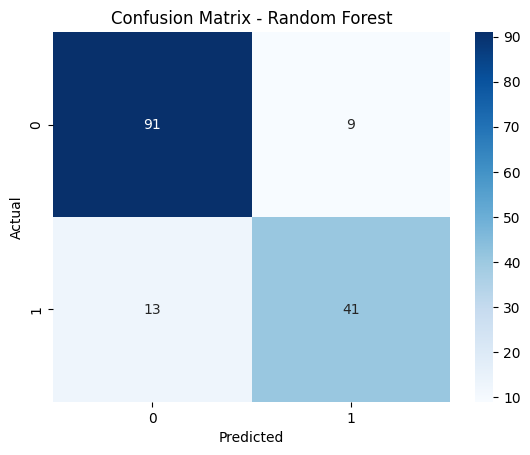

In [ ]:
# Performance Metrics chi tiết
# Confusion Metric 
cm = confusion_matrix(y_test, y_pred_rf)  # hoặc y_pred nếu logistic
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       100
           1       0.82      0.76      0.79        54

    accuracy                           0.86       154
   macro avg       0.85      0.83      0.84       154
weighted avg       0.86      0.86      0.86       154



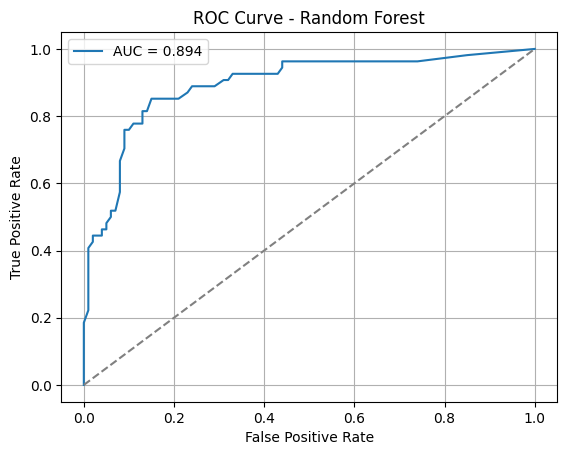

In [ ]:
# Nếu là mô hình như RF có predict_proba
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # xác suất là class 1

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

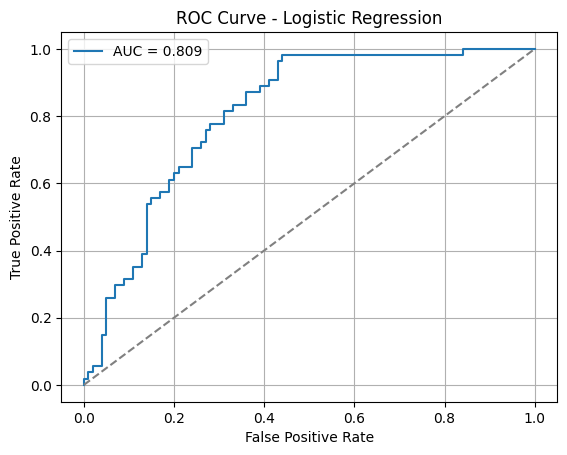

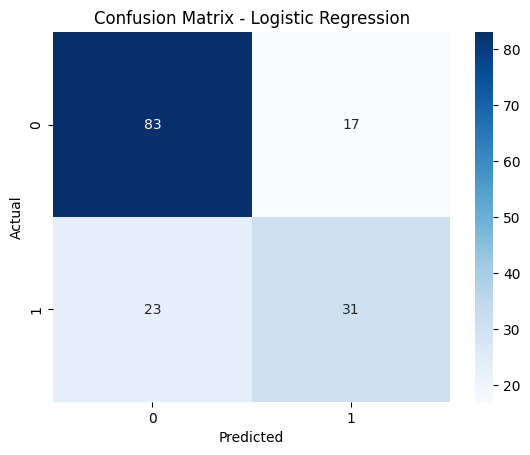

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



In [ ]:
# Tính xác suất (probability) dự đoán
y_prob_logreg = model.predict_proba(X_test)[:, 1]

# Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
auc_score = roc_auc_score(y_test, y_prob_logreg)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred))


In [ ]:
# Tính các chỉ số cho Logistic Regression
metrics_logreg = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'AUC': roc_auc_score(y_test, y_prob_logreg)
}

# Tính các chỉ số cho Random Forest
metrics_rf = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_prob_rf)
}

# Tạo DataFrame để hiển thị so sánh
comparison_df = pd.DataFrame([metrics_logreg, metrics_rf])
comparison_df.set_index('Model', inplace=True)

# Hiển thị bảng so sánh
comparison_df.round(3)

,Accuracy,Precision,Recall,F1-score,AUC
Model,,,,,
Logistic Regression,0.740,0.646,0.574,0.608,0.809
Random Forest,0.857,0.820,0.759,0.788,0.894


Mô hình Random Forest cho hiệu suất vượt trội hơn rõ rệt, đặc biệt ở khả năng phát hiện bệnh nhân tiểu đường (Recall và F1-score cao hơn).

Đường cong ROC của Random Forest nằm gần phía trên trái đồ thị, cho thấy khả năng phân biệt lớp rất tốt.

Logistic Regression vẫn là một mô hình đơn giản, dễ diễn giải và phù hợp nếu cần mô hình nhẹ hoặc có yêu cầu giải thích rõ ràng.

Tuy nhiên, trong bối cảnh nhạy cảm như chẩn đoán bệnh, ưu tiên mô hình có Recall cao hơn để giảm bỏ sót bệnh nhân – do đó Random Forest phù hợp hơn.

Kết luận: Random Forest là mô hình được chọn để sử dụng cho các bước tiếp theo do hiệu suất dự đoán tốt và cân bằng giữa các chỉ số quan trọng.

In [ ]:
# Cross-Validation Results Summary
# Logistic Regression - Diễn giải bằng hệ số (coefficient)
# Lấy tên các cột đã sử dụng
feature_names = X_train.columns

# Lấy hệ số từ mô hình Logistic Regression
coefs = model.coef_[0]

# Tạo bảng
logreg_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})
logreg_coef_df['Abs_Coefficient'] = np.abs(logreg_coef_df['Coefficient'])
logreg_coef_df = logreg_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(logreg_coef_df[['Feature', 'Coefficient']])


                 Feature  Coefficient
2  Insulin_Glucose_Ratio     1.262810
4                Age_log     1.092021
0             Risk_Score     0.310340
3                    BMI     0.086845
1                Glucose     0.040312
5         Blood_Pressure    -0.000053


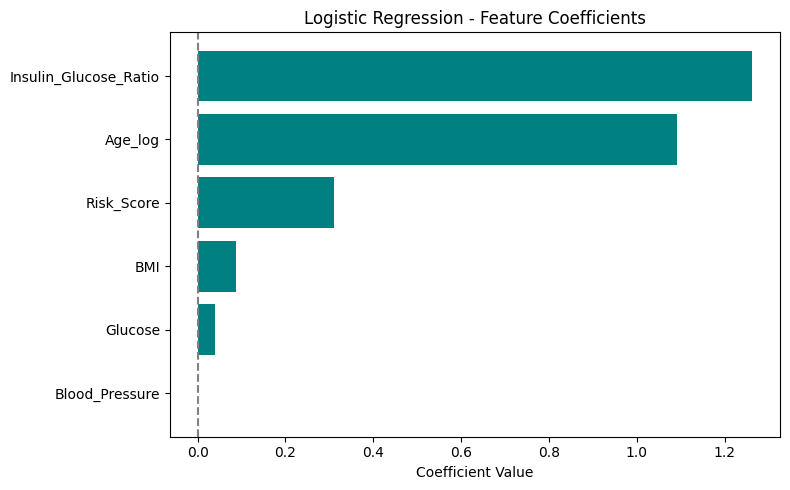

In [ ]:
# Vẽ biểu đồ hệ số
plt.figure(figsize=(8, 5))
plt.barh(logreg_coef_df['Feature'], logreg_coef_df['Coefficient'], color='teal')
plt.axvline(0, color='gray', linestyle='--')
plt.gca().invert_yaxis()
plt.title("Logistic Regression - Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest – Diễn giải bằng độ quan trọng đặc trưng (feature importance)
# Lấy importance từ mô hình RF
importances = rf.feature_importances_

rf_feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
rf_feat_df = rf_feat_df.sort_values(by='Importance', ascending=False)

print(rf_feat_df)

                 Feature  Importance
0             Risk_Score    0.260997
2  Insulin_Glucose_Ratio    0.243093
1                Glucose    0.225331
3                    BMI    0.110836
4                Age_log    0.093549
5         Blood_Pressure    0.066194


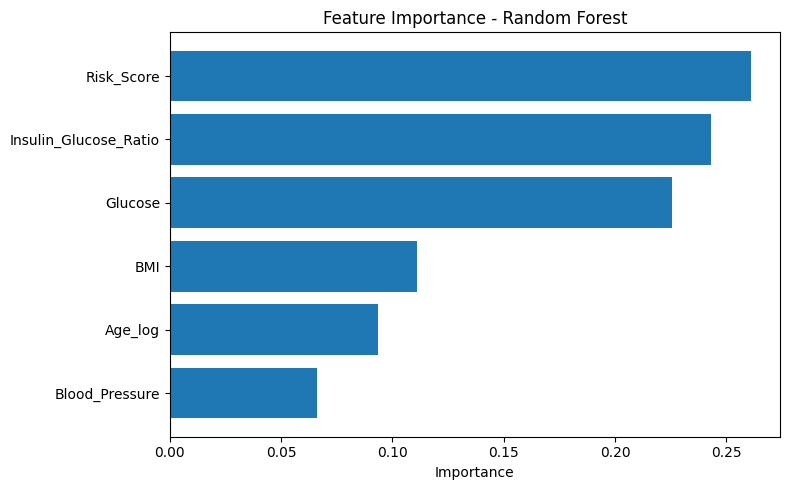

In [ ]:
plt.figure(figsize=(8, 5))
plt.barh(rf_feat_df['Feature'], rf_feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()